# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

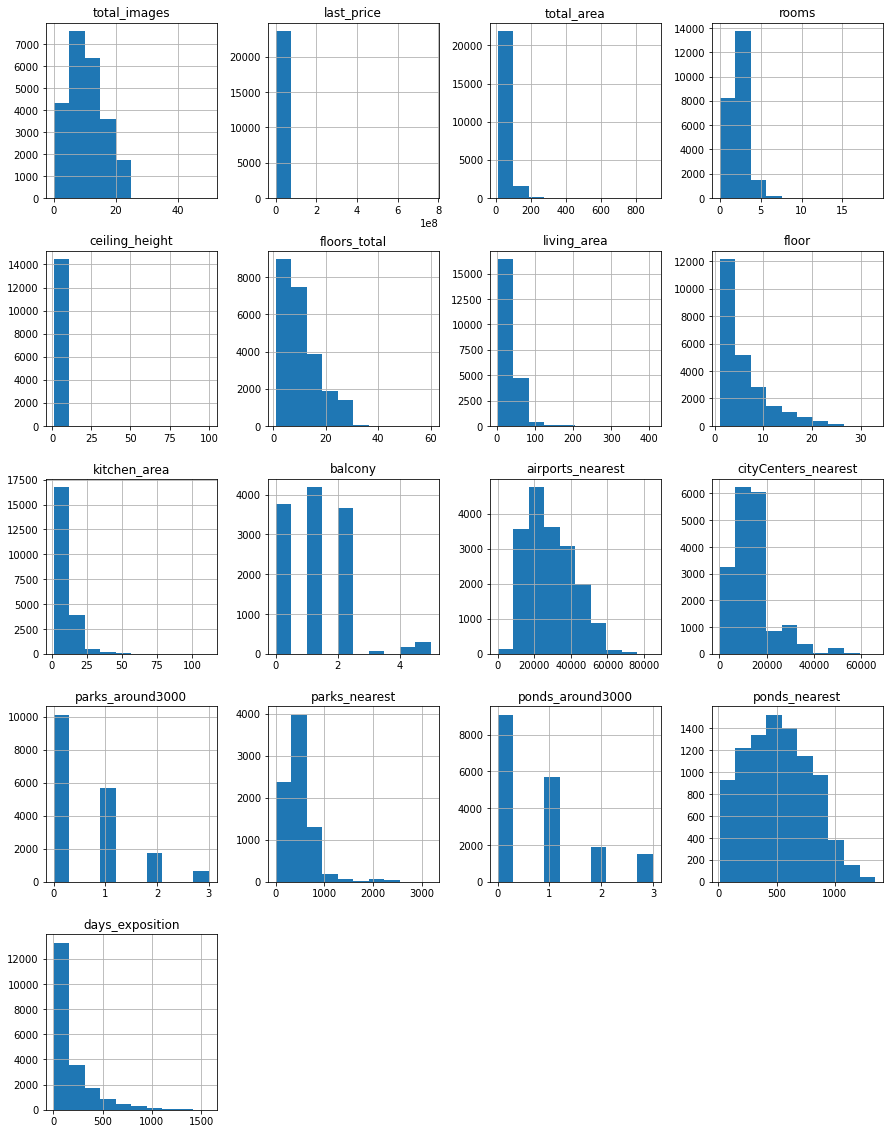

In [4]:
data.hist(figsize=(15, 20))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<strong>При ознакомлении с первчиным датасетом мы можем сделать следующие выводы:</strong>
<ul>
    <li>first_day_exposition - нужно перевести в тип DataTime</li>
    <p></p>
    <li>ceiling_height - около 40% значений отсутсвуют, потолки есть в любой квартире, поэтому отсутвие значений может быть связанно с тем, что люди не заполняют эту информацию, так как не могут точно знать высоту потолков. </li>
    <p></p>
    <li> floors_total - значения нужно перевести в целые числа. </li>
    <p></p>
    <li>living_area - около 9% значений отсутсвуют.Возможно отсутвие значений связанно с тем, что часть квартир имеют открытую планировку, а это означает, что площадь жилых комнат не рассчитать, т.к. она объединена.</li>
    <p></p>
    <li>is_apartment - около 90% значений отсутсвуют, есть предположение, что NaN в значениях это "0", т.е. не апартамент. Эту гипотезу можно проверить сопоставлением открытого типа планировки и средней площадью аппартаментов из датасета. Либо сопоставить с столбцом "studio". Также необходимо перевести тип данных в "bool"</li>
    <p></p>
    <li>kitchen_area - около 10% значений отсутсвуют, возможно отсутвие значений связанно с тем, что часть квартир имеют открытую планировку, а это означает, что площать кухни не рассчитать, т.к. она объединена. </li>
    <p></p>
    <li>balcony - около 10% значений отсутсвуют, вероятно не в каждой квартире может быть балкон, на пример часть аппартаментов имеют планировку без балкона </li>
    <p></p>
    <li>locality_name  - меньше 1% значений отсутвует, на  исследование это не должно повлиять </li>
    <p></p>
    <li>airports_nearest  - 24% значений отсутвует, наличие ближайшего аэропорта можно проверить исходя из населенного пункта, но если эта информация не потреюуется для исследования, данные можно не заполнять. </li>
    <p></p>
    <li>cityCenters_nearest  - 24% значений отсутвует, если населенный пункт не является городом, то вполне вероятно, что указывать расстояние до центра города не имеет смысла</li>
    <p></p>
    <li>parks_around3000   - 24% значений отсутвует, есть предположение, что отсутвие данных означает фактическое отсутсвие парков</li>
    <p></p>
    <li>parks_nearest - 65% значений отсутвует, поскольку данные имеют количественный харрактер, то на них нужно оветить приблизительно точно, нежели "да" или "нет". Скорее всего большая часть людей поленилось заполнить эти данные.</li>
    <p></p>
    <li>ponds_around3000 - 24% значений отсутвует, есть предположение, что отсутвие данных означает фактическое отсутсвие водоемов</li>
    <p></p>
    <li>ponds_nearest - 65% значений отсутвует, поскольку данные имеют количественный харрактер, то на них нужно оветить приблизительно точно, нежели "да" или "нет". Скорее всего большая часть людей поленилось заполнить эти данные</li>
    <p></p>
     <li>days_exposition - 14% значений отсутвует</li> 
</ul>
<strong>Вывод: </strong><p> При ознакомлении с датасетом, выявилось наличие пропусков в больше, чем половине столбцов. Не стоит сразу предпринимать решения, по поводу заполнения этих пропусков. Возможно, данные не потребуются для дальнейшего исследования , если же потребность в заполении возникнет, то с пропусками нужно будет провести работу, а пока, стоит разобраться с форматом данных в столбцах. </p>


### Предобработка данных

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [7]:
print( 'Кол-во дубликатов в датасете:', data.duplicated().sum())

Кол-во дубликатов в датасете: 0


Для начала переведем значения в колонке "first_day_exposition" в нужный тип данных

In [8]:
data['first_day_exposition'] =  pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].dtypes)

datetime64[ns]


Далее: переведем 'floors_total' в int формат.Но для этого заполним пропуски на значения равные фактическому этажу.

In [9]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [10]:
data['floors_total'] = data['floors_total'].astype(int)

Далее: переведем значения в колонке "is_apartment " в булев тип данных, обратим внимание, что после изменения типа данных, пропуски в столбце пропадают.

In [11]:
print('Количество пропусков в "is_apartament"', data['is_apartment'].isna().sum())

Количество пропусков в "is_apartament" 20924


In [12]:
data['is_apartment'] = data['is_apartment'].astype('bool')
print(data['is_apartment'].dtypes)

bool


In [13]:
print('Количество пропусков в "is_apartament"', data['is_apartment'].isna().sum())

Количество пропусков в "is_apartament" 0


Теперь заменим неявные дубликаты в столбце "locality_name". Проверим уникальные значения и произведем замену.

In [14]:

print('Количество уникальных значений в столбце "locality_name":',len(data['locality_name'].unique()))


Количество уникальных значений в столбце "locality_name": 365


In [15]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё','е')\
    .str.replace('поселок городского типа','поселок')\
    .str.replace('городской поселок','поселок')

print('Количество уникальных значений в столбце "locality_name" после замены:',len(data['locality_name'].unique()))

Количество уникальных значений в столбце "locality_name" после замены: 323


У нас получилось избавиться от 42  дубликатов, на всякий случай перепроверим уникальные значения еще раз.

In [16]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

Теперь перейдем к изучению  данных в столбце 'ceiling_height', известно что средняя высота пролета потолка 2,7 метров. Иногда есть и высокие потолки +3 метра. Также, многие люди моги указать данные не высоты потолка, а высоты пролета (Высота от плиты перекрытия плиты перекрытия на следующем этаже). С помощью диаграммы размаха изучим данные.

(0.0, 40.0)

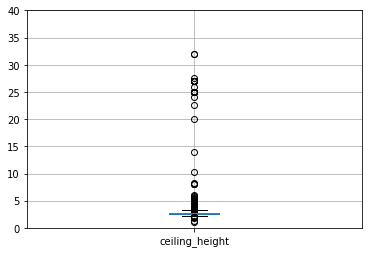

In [17]:
data.boxplot(column=['ceiling_height'])
plt.ylim(0, 40)

Мы видим выбросы, начиная с 3,2 метров. Предположим, что двухэтажные квартиры/дома с открытым этажем могут иметь высоту 8.4 метра (Примерно 2 этажа, если считать по высоте пролета). Но все, что выше уже кажется недоверчиво-подозрительным. 

Также, если смотреть на данные 25+ метров, то можно предположить, что вероятнее всего высота 2,5+ метров, но данные были внесены некорректно, это возможно исправить.

Поэтому мы удалим все аномальные значения, начинающиеся с + метров до 2,5 метров, с 10 метров до 25 метров и поделим на 10 все значения от 25 метров до 35 метров.

In [18]:

data.loc[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 35), 'ceiling_height'] = data['ceiling_height']/10
data.loc[(data['ceiling_height'] >= 10) & (data['ceiling_height'] < 25), 'ceiling_height'] = data['ceiling_height'].median()
data.loc[(data['ceiling_height'] > 0) & (data['ceiling_height'] < 2.5), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


Заменим пропущенные и неверные данные на медиану  и обратимся к диаграмме размаха еще раз.

(0.0, 35.0)

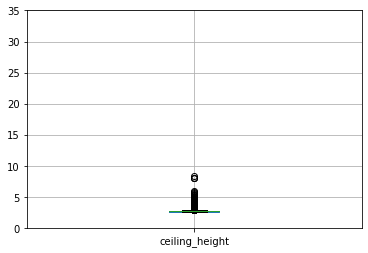

In [19]:
data.boxplot(column=['ceiling_height'])
plt.ylim(0, 35)

Выбросы пропали, а это значит, что с данными в столбце "ceiling_height" можно работать.

<AxesSubplot:>

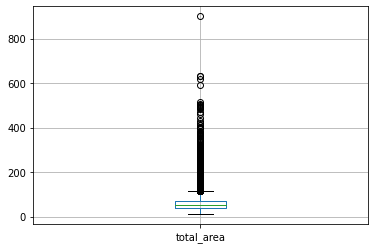

In [20]:
data.boxplot(column=['total_area'])

Проверим столб "total_area" Заметно аномально-большое значение площади, свыше 800 кв метров. Обратимся к этой строке.

In [21]:
data.loc[data['total_area'] >= 800]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,True,...,112.0,NaN,санкт-петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


В глаза бросается стоимость 420 млн и 12 комнат, скорее всего фактическая площадь корректна, это значит, что более меньшая площадь тоже может быть корректна, поэтому аномальные данные, мы удалять не будем.

<AxesSubplot:>

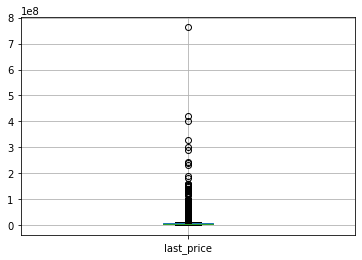

In [22]:
data.boxplot(column=['last_price'])

Проверим столб "last_price" Заметно аномально-большое значение стоимости, свыше 700 000 000 руб (В переводе с le8). Обратимся к этой строке.

In [23]:
data.loc[data['last_price'] >= 700000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10,250.0,10,True,...,NaN,2.0,санкт-петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


Выглядит внушительно, действительно такие цены есть, в квартире может быть сделан очень дорогой ремонт, поэтому такая стоимость внушает доверие.

<AxesSubplot:>

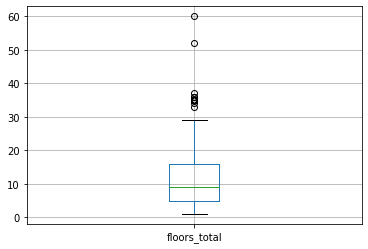

In [24]:
data.boxplot(column=['floors_total'])

In [25]:
data.loc[data['floors_total'] > 50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,True,...,7.4,NaN,кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,True,...,14.0,NaN,санкт-петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


Проверим столб "floors_total". 50 этаже в Кронштадте явно ошибка, также, как 52 этажа в СПБ.Википедия говорит, что после Лахта центра самое высокое здание в Санкт-Петербурге имеет 42 этажа. Это Лидер Тауэр, следовательно все, что ниже 42-х, имеет место быть, а выше - нет.

In [26]:
data.loc[(data['floors_total'] >= 42), 'floors_total'] = data['floors_total'].median()

<AxesSubplot:>

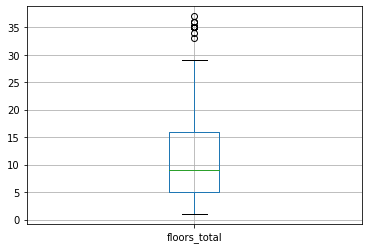

In [27]:
data.boxplot(column=['floors_total'])

Аномалии заменили на медиану среди этажей.В данном случае подходит больше медиана, нежели значение "0", так как шансы встретить нулевой этаж предельно низкие.

<AxesSubplot:>

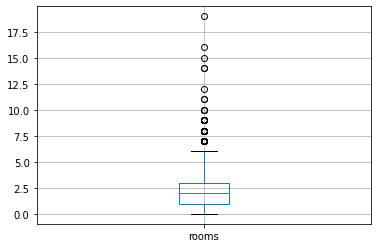

In [28]:
data.boxplot(column=['rooms'])

In [29]:
data.loc[data['rooms'] > 15]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09,19,2.65,5.0,264.5,2,True,...,27.6,NaN,санкт-петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,True,...,13.0,1.0,санкт-петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0


Проверим столб "rooms". В среднем выходит по 16-19 кв метров на комнату, выглядит внушительно, поэтому удалять данные не будем.

<AxesSubplot:>

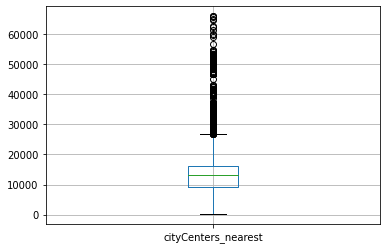

In [30]:
data.boxplot(column=['cityCenters_nearest'])

In [31]:
data.loc[data['cityCenters_nearest'] > 60000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
577,7,4000000.0,59.0,2017-07-23,3,2.50,5.0,37.0,1,False,...,7.0,NaN,поселок молодежное,84665.0,65764.0,0.0,NaN,0.0,NaN,NaN
2974,13,3200000.0,46.3,2018-03-31,2,2.50,3.0,29.2,2,True,...,7.0,1.0,зеленогорск,81355.0,62454.0,0.0,NaN,0.0,NaN,205.0
5218,15,3650000.0,53.8,2018-09-24,3,2.50,4.0,36.9,3,True,...,5.2,NaN,поселок молодежное,83758.0,64857.0,0.0,NaN,0.0,NaN,121.0
5340,19,3600000.0,50.6,2019-03-19,2,2.50,5.0,29.9,4,True,...,7.0,1.0,поселок молодежное,84853.0,65952.0,0.0,NaN,0.0,NaN,NaN
9640,8,4200000.0,51.4,2014-12-10,2,2.55,5.0,31.0,2,True,...,6.0,1.0,поселок молодежное,84869.0,65968.0,0.0,NaN,0.0,NaN,1194.0
16569,13,3200000.0,52.8,2017-06-20,2,2.55,5.0,29.9,3,True,...,8.3,NaN,ломоносов,53042.0,61495.0,2.0,223.0,0.0,NaN,240.0
18884,15,3600000.0,57.6,2019-02-08,3,2.55,3.0,41.3,2,True,...,6.5,1.0,зеленогорск,81607.0,62706.0,0.0,NaN,0.0,NaN,13.0
20746,1,3300000.0,43.5,2016-02-16,2,2.55,4.0,27.2,2,True,...,5.0,1.0,поселок молодежное,84006.0,65105.0,0.0,NaN,0.0,NaN,1043.0
23123,0,1800000.0,32.0,2018-07-17,1,2.65,2.0,17.0,1,True,...,6.0,NaN,ломоносов,56896.0,60223.0,1.0,17.0,0.0,NaN,147.0


Проверим столб "cityCenters_nearest". Среди отфильррванного списка в основном посселки, в которых расстояние указанно до центра СПБ.Выглядит внушительно, поэтому удалять данные не будем.

<AxesSubplot:>

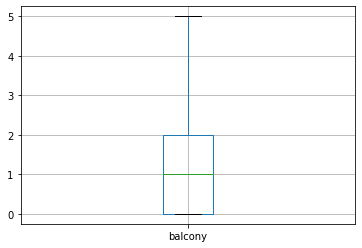

In [32]:
data.boxplot(column=['balcony'])

Проверим столб "balcony". В часть значений отсутввует, возможно это связанно с тем, что люди не заполняли его, так как балкона просто напросто нет в квартире. Проверим, что за квартиры от 4-х комнат имеют +4 балконов.(Скорее всего квартира с 4 - мя комнатами, не может иметь 4 балкона, но предположим, что такие есть, а вот когда число балконов превышает число комнант + кухня, то тут уже явно есть подозрения)

In [33]:
kitchen = 1# указываем переменую где кухня идет еще как 1 комната
data.loc[data['balcony'] > data['rooms']*2 + kitchen]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.65,24.0,15.50,2,True,...,NaN,2.0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12,0,2.65,17.0,24.75,4,True,...,NaN,2.0,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
654,6,2750000.0,36.00,2017-04-18,1,2.65,5.0,20.50,5,True,...,7.8,4.0,кронштадт,69785.0,51511.0,2.0,52.0,3.0,313.0,381.0
946,5,2200000.0,23.00,2016-09-27,0,2.65,27.0,18.00,7,True,...,NaN,2.0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1173,12,3240000.0,29.00,2018-10-30,0,2.65,24.0,17.00,2,True,...,NaN,2.0,санкт-петербург,35129.0,16293.0,0.0,NaN,1.0,475.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22869,0,15000000.0,25.00,2018-07-25,1,100.00,5.0,14.00,5,True,...,11.0,5.0,санкт-петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
23363,10,4300000.0,52.00,2019-04-21,1,2.70,16.0,28.00,8,False,...,11.0,5.0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23442,0,2500000.0,27.70,2017-09-28,0,2.65,24.0,18.00,4,True,...,NaN,2.0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23592,10,1450000.0,29.00,2017-11-11,0,2.65,9.0,18.00,8,True,...,NaN,2.0,никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Видим, что строки, где количество балконов превышает количество комнат + кухня есть, а это значит, что их нужно заменить, чтоб они не искажали данные.

In [34]:
data.loc[data['balcony'] > data['rooms']*2 + kitchen, 'balcony'] = data['balcony'].median()

Проверим еще раз, этихне должно остаться

In [35]:
data.loc[data['balcony'] > data['rooms']*2 + kitchen]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Теперь заполним пропуски в значениях на "0"

In [36]:
data['balcony'] = data['balcony'].fillna(0)

In [37]:
med_living = data['living_area'].median() #находим медиану жилой площади
med_kitchen = data['kitchen_area'].median() #находим медиану  кухонной площади
meadian_total_area = data['total_area'].median() #находим медиану общей площади
ratio_area_kitcen =  med_kitchen/meadian_total_area # получаем соотношение1
print('Кухня занимает пройент от общей площади:', ratio_area_kitcen)
ratio_area_living =  med_living/meadian_total_area # получаем соотношение2
print('Жилая площадь занимает пройент от общей площади:',ratio_area_living)





Кухня занимает пройент от общей площади: 0.175
Жилая площадь занимает пройент от общей площади: 0.5769230769230769


In [38]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*ratio_area_kitcen)
data['living_area'] = data['living_area'].fillna(data['total_area']*ratio_area_living)
# пропущенные значения заполняем произведениемобщей площади и соотношения 

Столбцы 'airports_nearest',        'parks_nearest', 'ponds_nearest'    и          'cityCenters_nearest' оставим без заполнения пропусков, а пропуски в столбах 'ponds_around3000',         'parks_around3000' можно заполнить '0', так как скорее всего, данные не заполнены, потому что парков в радиусе 3 км нет.

In [39]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [40]:
data['balcony'] = data['balcony'].astype('int')

In [41]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [42]:
data['floors_total'] = data['floors_total'].astype('int')

In [43]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median()).astype('int')

Обратимся к методу 'info', чтоб проверить, что нам еще осталось заполнить.

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Столбец 'days_exposition'. У нас есть все данные о первом дне публикации объявления, но к сожалению, нет данных о последнем дне. Поэтому пропуски в этом столбе мы заполнить не сможем. Есть предположения, что эти объявления до сих пор могут оставаться, но данные в датасете достаточно устаревшие, поэтому нужно бы разобраться, все ли ок с выгрузкой.

<strong>Вывод: </strong><p>В датасете часть столбцов оказались с пропущенными значениями. Все, где это возможно исправить, было сделанно.После предобработки с данными уже можно работать. По мере возникновения задач, можно возвращаться в блок с предобработкой и дорабатывать пропуски в недостающих значениях</p>

### Посчитайте и добавьте в таблицу новые столбцы

1.Добавим столбец с ценой квадратного метра

In [45]:
data['cost_per_square'] = data['last_price']/data['total_area']

2.Добавим столбец дня недели публикации

In [46]:
data['weekday'] = data['first_day_exposition'].dt.weekday

3.Добавим столбец месяц публикации объявления

In [47]:
data['month'] = data['first_day_exposition'].astype('datetime64[M]')

4.Добавим столбец год публикации объявления

In [48]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [49]:
data['month']

0       2019-03-01
1       2018-12-01
2       2015-08-01
3       2015-07-01
4       2018-06-01
           ...    
23694   2017-03-01
23695   2018-01-01
23696   2018-02-01
23697   2017-03-01
23698   2017-07-01
Name: month, Length: 23699, dtype: datetime64[ns]

5.Добавим столбец тип этажа

In [50]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

6.Добавим столбец c расстоянием в км с огруглением до целого числа

In [51]:
data['distantion'] = (data['cityCenters_nearest']/1000).round()

### Проведите исследовательский анализ данных

<strong>Общая площадь</strong>

<AxesSubplot:>

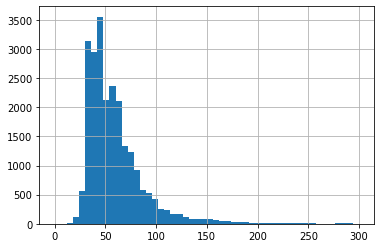

In [98]:
data['total_area'].hist(bins = 50,range=(0, 300))

In [53]:
print('Топ 10 объявлений с самой распространенной площадью:')
print(data['total_area'].value_counts().sort_values(ascending = False).head(10))

Топ 10 объявлений с самой распространенной площадью:
45.0    419
42.0    383
60.0    347
31.0    346
44.0    345
40.0    315
43.0    301
32.0    289
46.0    282
36.0    280
Name: total_area, dtype: int64


Более 4000 объявлений с квартирами, где общая площать составляет от 40 - 50 кв. метров. Далее идет 30-40 кв. метров, потом от 50-70.

<strong>Жилая площадь</strong>

<AxesSubplot:>

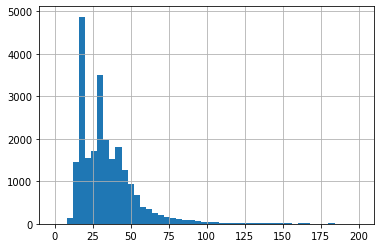

In [54]:
data['living_area'].hist(bins = 50,range=(0, 200))

In [55]:
print('Топ 10 объявлений с самой распространенной жилой площадью:')
print(data['living_area'].value_counts().sort_values(ascending = False).head(10))

Топ 10 объявлений с самой распространенной жилой площадью:
18.0    882
17.0    675
30.0    598
16.0    486
20.0    481
28.0    423
31.0    381
19.0    329
32.0    320
29.0    319
Name: living_area, dtype: int64


Среди этих  квартир, больше всего объявлений , где жилая площадь составляет от 15-25 кв. метров. Далее от 25 - 40 кв. метров.

<strong>Кухонная площадь</strong>

<AxesSubplot:>

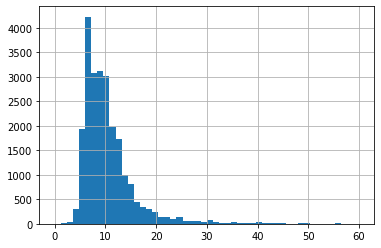

In [56]:
data['kitchen_area'].hist(bins = 50,range=(0, 60))

In [57]:
print('Топ 10 объявлений с самой распространенной кухонной площадью:')
print(data['kitchen_area'].value_counts().sort_values(ascending = False).head(10))

Топ 10 объявлений с самой распространенной кухонной площадью:
6.0     1300
10.0    1262
8.0     1110
9.0     1101
7.0     1095
11.0     797
12.0     662
8.5      415
5.5      400
14.0     395
Name: kitchen_area, dtype: int64


Больше всего объявлений, с кухонной площадью от 5-15 кв. метров.Далее виден значительный спад объявлений, где кухонная площадь больше 15 кв. метров.

<strong>Цена объекта</strong>

<AxesSubplot:>

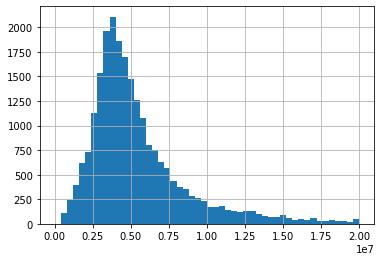

In [58]:
data['last_price'].hist(bins = 50, range =(0,20000000))

In [59]:
print('Топ 10 объявлений с самой распространенной ценой:')
print(data['last_price'].value_counts().sort_values(ascending = False).head(10))

Топ 10 объявлений с самой распространенной ценой:
4500000.0    342
3500000.0    291
4000000.0    260
4300000.0    260
4200000.0    259
3600000.0    257
3300000.0    244
3800000.0    240
3200000.0    238
3700000.0    234
Name: last_price, dtype: int64


Больше всего объявлений с ценой от 3 500 000 до 4 500 000 руб.

<strong>Количество комнат</strong>

<AxesSubplot:>

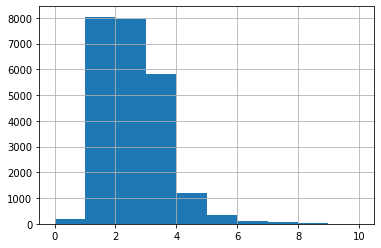

In [60]:
data['rooms'].hist(bins = 10,range=(0, 10))

In [61]:
print('Топ 10 объявлений с самым распространенным кол-вом комнат:')
print(data['rooms'].value_counts().sort_values(ascending = False).head(10))

Топ 10 объявлений с самым распространенным кол-вом комнат:
1    8047
2    7940
3    5814
4    1180
5     326
0     197
6     105
7      59
8      12
9       8
Name: rooms, dtype: int64


Больше всего объявлений квартир с 1- комнатой, потом идет 2, далее 3.

<strong>Высота потолков</strong>

<AxesSubplot:>

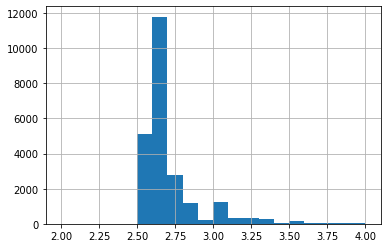

In [62]:
data['ceiling_height'].hist(bins = 20,range=(2, 4))

In [63]:
print('Топ 10 объявлений с самой распространенной высотой потолков:')
print(data['ceiling_height'].value_counts().sort_values(ascending = False).head(10))

Топ 10 объявлений с самой распространенной высотой потолков:
2.65    9949
2.50    3522
2.60    1647
2.70    1582
3.00    1112
2.80     993
2.55     980
2.75     911
3.20     279
3.10     203
Name: ceiling_height, dtype: int64


Больше всего объявлений квратир, где высота потолка 2,65 метров. Далее идет высота 2,5 метров, после 2,6.

<strong>Этаж квартиры</strong>

<AxesSubplot:>

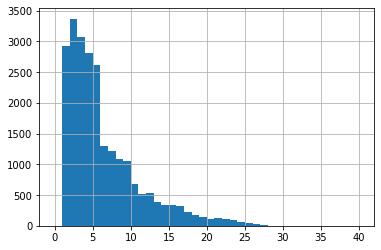

In [64]:
data['floor'].hist(bins = 40,range=(0, 40))

In [65]:
print('Топ 10 объявлений с самым распространенным числом этажей:')
print(data['floor'].value_counts().sort_values(ascending = False).head(10))

Топ 10 объявлений с самым распространенным числом этажей:
2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
Name: floor, dtype: int64


Больше всего объявлений квартир со 2-го этажа, далее идет 3-й и только потом 1-ый.

<strong>Тип этажа квартиры</strong>

<AxesSubplot:>

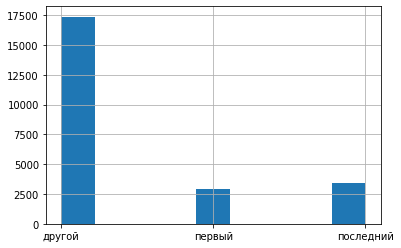

In [66]:
data['floor_type'].hist(bins = 9)

In [67]:
print('Топ 3 объявлений квратир с типом эатажа:')
print(data['floor_type'].value_counts().sort_values(ascending = False).head(10))

Топ 3 объявлений квратир с типом эатажа:
другой       17363
последний     3419
первый        2917
Name: floor_type, dtype: int64


Объявлений с продажей квартиры на последнем этаже примерно на 500 больше, чем на первом. Объявлений не на первом и не на последнем 17363.

<strong>Общее количество этажей в доме</strong>

<AxesSubplot:>

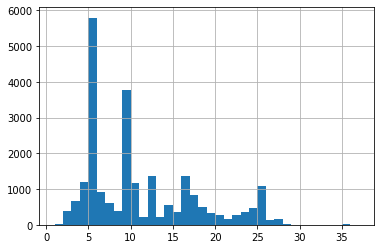

In [68]:
data['floors_total'].hist(bins = 36)

In [69]:
print('Топ 10 объявлений с самым распространенным числом этажей в доме:')
print(data['floors_total'].value_counts().sort_values(ascending = False).head(10))

Топ 10 объявлений с самым распространенным числом этажей в доме:
5     5792
9     3768
16    1376
12    1368
4     1210
10    1177
25    1075
6      923
17     834
3      672
Name: floors_total, dtype: int64


Больше всего объявлений с домами, где 5 этажей. Далее идет 9 этажей, потом 16.

<strong>Расстояние до центра города в метрах</strong>

<AxesSubplot:>

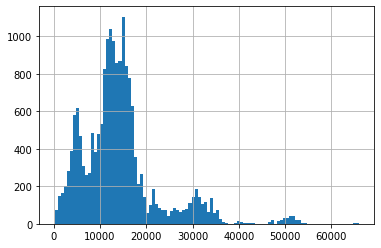

In [70]:
data['cityCenters_nearest'].hist(bins = 100)

In [71]:
print('Топ 10 объявлений с самым распространенным расстоянием до центра:')
print(data['cityCenters_nearest'].value_counts().sort_values(ascending = False).head(10))

Топ 10 объявлений с самым распространенным расстоянием до центра:
8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
10364.0    26
8370.0     26
4836.0     25
17369.0    24
13056.0    23
Name: cityCenters_nearest, dtype: int64


Больше всего объявлений квартир, нахолдящихся в радиусе 15 км от центра города

<strong>Расстояние до ближайшего аэропорта</strong>

<AxesSubplot:>

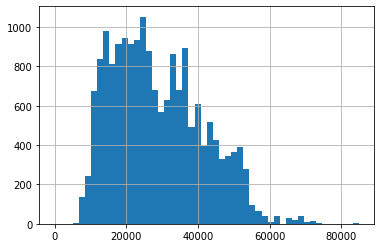

In [72]:
data['airports_nearest'].hist(bins = 50)

In [73]:
print('Топ 10 объявлений с самым распространенным расстоянием до аэропорта:')
print(data['airports_nearest'].value_counts().sort_values(ascending = False).head(10))

Топ 10 объявлений с самым распространенным расстоянием до аэропорта:
37434.0    61
21928.0    32
39946.0    30
44870.0    30
18732.0    27
37407.0    27
39140.0    26
31744.0    25
37412.0    24
47303.0    23
Name: airports_nearest, dtype: int64


Больше всего объявлений квартир, нахолдящихся в радиусе 23 км от аэропорта.

<strong>Расстояние до ближайшего парка</strong>

<AxesSubplot:>

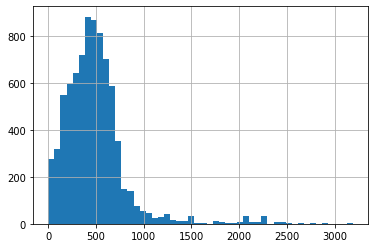

In [74]:
data['parks_nearest'].hist(bins = 50)

In [75]:
print('Топ 10 объявлений с самым распространенным расстоянием до парка:')
print(data['parks_nearest'].value_counts().sort_values(ascending = False).head(10))

Топ 10 объявлений с самым распространенным расстоянием до парка:
441.0     67
173.0     41
392.0     41
456.0     40
471.0     32
2102.0    30
458.0     29
541.0     29
447.0     28
288.0     28
Name: parks_nearest, dtype: int64


Больше всего объявлений квартир, нахолдящихся в радиусе 0,5 км от парка. Далее в 0,75 км.

<strong>День и месяц публикации объявления</strong>

<AxesSubplot:>

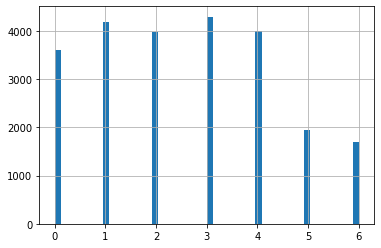

In [76]:
data['weekday'].hist(bins = 50)

In [77]:
print('Топ 7 объявлений с самым распространенным днем публикации:')
print(data['weekday'].value_counts().sort_values(ascending = False).head(10))

Топ 7 объявлений с самым распространенным днем публикации:
3    4295
1    4183
4    4000
2    3974
0    3612
5    1936
6    1699
Name: weekday, dtype: int64


Больше всего объявлений было выложенно в четверг, затем идет вторник и пятница. Меньше всего объявлений было выложенно в всокресенье

<AxesSubplot:>

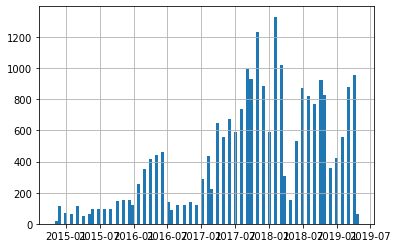

In [78]:
data['month'].hist(bins = 100)

In [79]:
print('Топ 12 объявлений с самым распространенным месцем публикации:')
print(data['month'].value_counts().sort_values(ascending = False).head(10))

Топ 12 объявлений с самым распространенным месцем публикации:
2018-02-01    1331
2017-11-01    1230
2018-03-01    1022
2017-09-01     994
2019-04-01     956
2017-10-01     930
2018-10-01     927
2017-12-01     887
2019-03-01     879
2018-07-01     875
Name: month, dtype: int64


Больше всего объявлений было выложенно в феврале, затем в марте и потом в апреле. Меньше всего в декабре.

<strong>Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.</strong>

<AxesSubplot:>

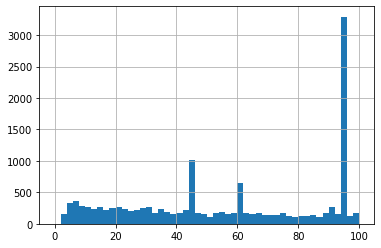

In [80]:
data['days_exposition'].hist(bins = 50, range = (0, 100))

In [81]:
print('Среднее значение столбца "days_exposition": ',data['days_exposition'].mean())
print('Медиана cтолбца "days_exposition": ',data['days_exposition'].median())
print(data['days_exposition'].value_counts().sort_values(ascending = False).head(10))

Среднее значение столбца "days_exposition":  169.36022616988058
Медиана cтолбца "days_exposition":  95.0
95    3245
45     880
60     538
7      234
30     208
90     204
4      176
3      158
5      152
14     148
Name: days_exposition, dtype: int64


<strong>Вывод: </strong>
<p>
Обратившись к гистограмме, мы видим, что большая часть объявлений снимается до 200 дней, при этом примерным временем продажи квартиры можно назвать 95 дней. Это почти в 2 раза меньше, чем среднее арифметическое, но мы ориентируемся на медиану, так как в датасете есть объявления, которые висят более 3-х лет, тем самым искажая среднее время продажи.
В топ 10 объявлениях с самым распространенным кол-вом дня объявления, мы можем сказать, что есть продажи и спустя 3, 4, 5,7 , 9 дней. Это достаточно быстрый показатель, поэтому возьмем, что быстрыми продажами можно считать объявления до 45-и дней. Также, если увеличить график, то на нем виден аномальный пик, где объявления исчезают спустя 45 дней и еще больше спустя 90 дней. Вероятно, это связанно с тем, что время публикации объявления ограниченно, поэтому на 45 или 90 -й день, объявления пропадают, либо перезаливаются. Таким образом, если квартиру не продают в первые 45 дней, то вероятность, что ее продадут в следующие 45 дней выше.
К необычно долгим можно отнести все объявления после 400 дней т.к на графике по оси х в районе 420 дней видна просадка, после которой динамика все ниже и ниже.</p>

<strong>Какие факторы больше всего влияют на общую (полную) стоимость объекта?</strong>

<AxesSubplot:xlabel='total_area'>

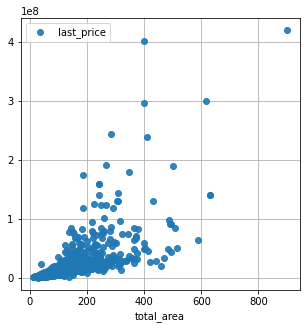

In [82]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5), alpha=0.9)


In [83]:
print('Корреляция стоимсоти и площади: ', data['last_price'].corr(data['total_area']))

Корреляция стоимсоти и площади:  0.6536750579657242


<AxesSubplot:xlabel='living_area'>

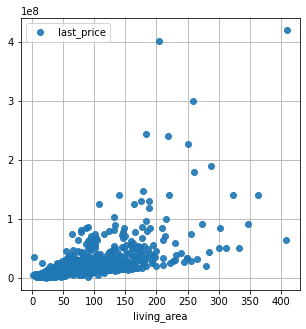

In [84]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5), alpha=0.9)

In [85]:
print('Корреляция стоимсоти и жилой площади: ', data['last_price'].corr(data['living_area']))

Корреляция стоимсоти и жилой площади:  0.5858907700395659


<AxesSubplot:xlabel='kitchen_area'>

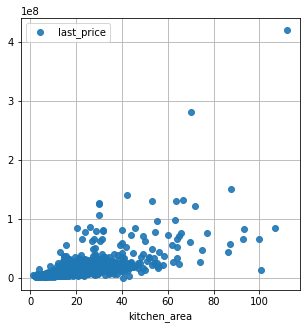

In [86]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5), alpha=0.9)

In [87]:
print('Корреляция стоимсоти и кухонной площади: ', data['last_price'].corr(data['kitchen_area']))

Корреляция стоимсоти и кухонной площади:  0.5141194369951924


<AxesSubplot:xlabel='rooms'>

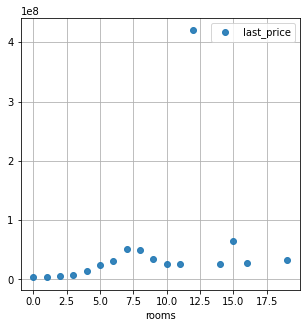

In [88]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o', figsize=(5, 5), alpha=0.9)

In [89]:
print('Корреляция стоимсоти и кол-ва комнат: ', data['last_price'].corr(data['rooms']))

Корреляция стоимсоти и кол-ва комнат:  0.3633428499648948


<AxesSubplot:xlabel='floor_type'>

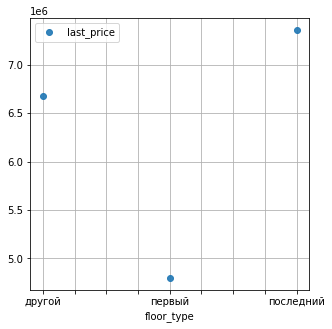

In [90]:
data.pivot_table(index='floor_type', values='last_price').plot(grid=True, style='o', figsize=(5, 5), alpha=0.9)

<AxesSubplot:xlabel='floor'>

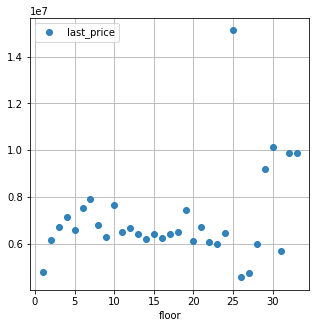

In [91]:
data.pivot_table(index='floor', values='last_price').plot(grid=True, style='o', figsize=(5, 5), alpha=0.9)

In [92]:
print('Корреляция стоимсоти и этажа квартиры: ', data['last_price'].corr(data['floor']))

Корреляция стоимсоти и этажа квартиры:  0.0265756432844708


<AxesSubplot:xlabel='year'>

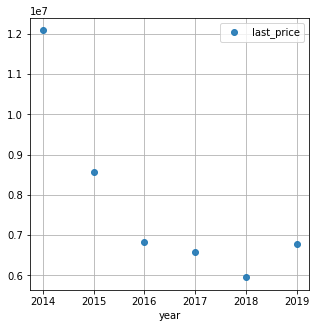

In [93]:
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o', figsize=(5, 5), alpha=0.9)

In [94]:
print('Корреляция стоимсоти года объявления: ', data['last_price'].corr(data['year']))

Корреляция стоимсоти года объявления:  -0.043089036199508615


<AxesSubplot:xlabel='month'>

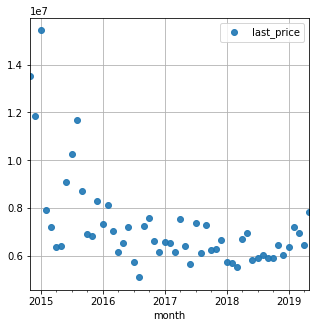

In [95]:
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o', figsize=(5, 5), alpha=0.9)

<AxesSubplot:xlabel='weekday'>

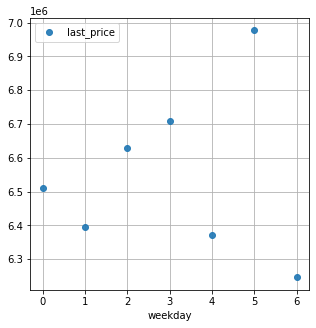

In [99]:
data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o', figsize=(5, 5), alpha=0.9)

In [100]:
print('Корреляция стоимсоти дня недели объявления: ', data['last_price'].corr(data['weekday']))

Корреляция стоимсоти дня недели объявления:  0.0015501452176215407


<strong>Вывод: </strong>
<strong>Стоимость объявления квартиры зависит от таких факторов как:</strong>
<ul>
    <li>Общая площадь</li>
    <li>Жилая площадь</li>
    <li>Кухонная плоадь</li>
</ul>
<strong>Стоимость частично зависит от:</strong>
<ul>
    <li>Количества комнат</li>
</ul>
<strong>Стоимость не зависит от таких факторов как:</strong>
<ul>
    <li>Дата публикации объявления</li>
    <li>Этажа квартиры</li>
</ul>

<strong>Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name</strong>

In [101]:
head_locality = data['locality_name'].value_counts().head(10).index.values#Выводим список городов с наибольшим числом объявлений и преобразовываем его в список 

In [102]:
#Проходимся циклом по названию городов из списка
mean_value = []
for value in head_locality:
    mean_value.append(data[data['locality_name'] == value]['cost_per_square'].mean())


In [103]:
#делаем таблицу из двух list
locality_mean_square = pd.DataFrame(
    {'locality': head_locality,
     'mean_square': mean_value,
    })

In [104]:
print(locality_mean_square.sort_values(by = 'mean_square', ascending = False).round(2))

            locality  mean_square
0    санкт-петербург    114849.01
4             пушкин    103125.82
8    деревня кудрово     92473.55
6  поселок парголово     90175.91
1     поселок мурино     85681.76
2     поселок шушары     78677.36
5            колпино     75424.58
7            гатчина     68746.15
3         всеволожск     68654.47
9             выборг     58141.91


<strong>Вывод: </strong>
<strong>Наиболее высокая цена за квадратный метр среди 10 наслеленных пунктов в:</strong>
<ul>
    <li>Cанкт-Петербург - средняя цена за кв метр 114849.01 руб.</li>
    <li>Пушкин - средняя цена за кв метр 103125.82 руб.</li>
    <li>Кудрово - средняя цена за кв метр 103125.82 руб.</li>
</ul>
<p>Самая низкая цена среди 10 наслеленных пунктов в Выборге - средняя цена за кв метр 58141.91 руб. </p>


<strong>Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.</strong>

Для расчета зависимости стоимости от растояния до центра в Санкт-Петербурге,для начала нам необходимо заполнить недостающие значения. Поскольку мы исследуем именно Санкт-Петергбург, то для заполненя пропусков в столбце 'distantion' подойдт медиана значений по СПБ.

In [105]:
median_distanton_spb = data.loc[data['locality_name'] == 'санкт-петербург', 'distantion'].median()
data.loc[data['locality_name'] == 'санкт-петербург', 'distantion'] = data['distantion'].fillna(median_distanton_spb)

После заполнения пропусков, перепроверим еще раз. Отфильтруем по городу, так как нас интересует только СПБ.

In [106]:
print('Количество пропусков',data.loc[data['locality_name'] == 'санкт-петербург', 'distantion'].isna().sum())

Количество пропусков 0


In [107]:
mean_distantion_spb = data.loc[data['locality_name'] == 'санкт-петербург', 'distantion'].mean()
mean_price_spb = data.loc[data['locality_name'] == 'санкт-петербург', 'last_price'].mean()
mean_cost_per_km_spb = (mean_price_spb/mean_distantion_spb).round(2)
print(f'Средняя стоимость каждого километра до центра в Санкт-Петербурге равна {mean_cost_per_km_spb} руб.')

Средняя стоимость каждого километра до центра в Санкт-Петербурге равна 695187.05 руб.


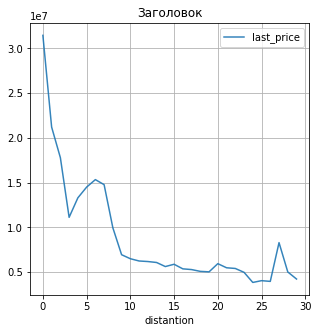

In [108]:
(
    data.query('locality_name  == "санкт-петербург"')
    .pivot_table(index = 'distantion', values = 'last_price')
    .plot(grid=True, style='-', figsize=(5, 5), alpha=0.9, title = 'Заголовок')
    
)
plt.show()

In [109]:
corr_spb = (data.query('locality_name  == "санкт-петербург"')['distantion']
    .corr(data.query('locality_name  == "санкт-петербург"')['last_price'])
)

In [110]:
print('Корреляция стоимсоти и дистанции до центра в Санкт-петербурге: ', corr_spb)

Корреляция стоимсоти и дистанции до центра в Санкт-петербурге:  -0.25784369205196866


<strong>Вывод: </strong>
<p>Зависимость рсстояния до цента Санкт-Петербурга и стоимости квартир имеется до 7,5 км (Радиус от цента), далее зависимость не такая явная.</p>


### Общий вывод

<strong>Больше всего объявлений с квартирами, где:</strong>
<ul>
<li>Общая площать составляет от 40 - 50 кв. метров.</li>
<li>Жилая площадь составляет от 15-25 кв. метров.</li>
<li>Кухонная площадь составляет от 5-15 кв. метров.</li>
<li>С ценой от 3 500 000 до 4 500 000 руб.</li>
<li>С 1- комнатой.</li>
<li>Где высота потолка 2,65 метров. </li>
<li>Со 2-го этажа.</li>
<li>Ни на первом и ни на последнем этаже.</li>
<li>С домами, где всего 5 этажей.</li>
<li>Находящихся в радиусе 15 км от центра города.</li>
<li>Находящихся в радиусе 23 км от аэропорта.</li>
<li>Находящихсярадиусе 0,5 км от парка.</li>
<li>Объявление было выложенно в четверг в феврале.</li>
</ul>


<strong>Сроки продажи квартир</strong>
<p>Боольшая часть квартир продается за 200 дней, при этом примерным временем продажи квартиры можно назвать 95 дней.
Быстрыми продажами можно считать объявления до 45-и дней.
К необычно долгим можно отнести все объявления после 400 дней.</p></p>

<strong>Стоимость объявления квартиры зависит от таких факторов как:</strong>
<ul>
    <li>Общая площадь</li>
    <li>Жилая площадь</li>
    <li>Кухонная плоадь</li>
</ul>
<strong>Стоимость не зависит от таких факторов как:</strong>
<ul>
    <li>Дата публикации объявления</li>
    <li>Этажа квартиры</li>
</ul>

<strong>Наиболее высокая цена за квадратный метр среди 10 наслеленных пунктов в:</strong>
<ul>
    <li>Cанкт-Петербург - средняя цена за кв метр 114849.01 руб.</li>
    <li>Пушкин - средняя цена за кв метр 103125.82 руб.</li>
    <li>Кудрово - средняя цена за кв метр 103125.82 руб.</li>
</ul>
<p>Самая низкая цена среди 10 наслеленных пунктов в Выборге - средняя цена за кв метр 58141.91 руб. </p>

<strong>Зависимость расстояния до цента Санкт-Петербурга и стоимости квартир</strong>
<p>Зависимость расстояния до цента Санкт-Петербурга и стоимости квартир имеется до 7,5 км (Радиус от цента), далее зависимость не такая явная.
Средняя стоимость каждого километра до центра в Санкт-Петербурге равна 695187.05 руб.</p>




<strong>Отчет о проделаных шагах:</strong>
<ul>
<li>1.Датасет изначально был оценен на наличие: Дубликатов, пропусков, аномальных значений, формата значений. </li>
<li>2.Пропуски значений были заполненны медианными значениями. (Там, где бы это не повлияло на вывод.) </li>
<li>3.Аномальные значения были проверены и удалены в случае неправдоподбности. (На пример, 50 дом в Кронштадте)</li>
<li>4. Формат значений был изменен, чтоб с ним было удобнее работать.</li>
<li>5. Были добавленны новые столбцы со стоимостью кв. метра, расстояния до центра в км, дня, месяца и года публикации объявления.</li>
<li>6. По каждому столбцу была построенна гистограмма и произведен анализ наиболее встречающихся объявлений по определенному параметру</li>
<li>7. Был произведен анализ зависимости показателей и рассчитана их кореляция. На основе наблюдений был составлен вывод.</li>
<li>8 .Была рассчитана средняя цена километра до центра в Санкт-Петербурге, а также также расчитана зависимость показателя стоимости от близости к центру.</li>
<li>9. На основе всех наблюдений был составлен общий вывод.</li>
</ul>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод